# 04 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

## LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE coloumn으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.target
print("Boston 데이터 세트 크기: ", bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 피처 설명
* **CRIM**: 지역별 범죄 발생률
* **ZN**: 25,000평방 피트를 초과하는 거주 지역의 비율
* **INDUS**: 비상업 지역 넓이 비율
* **CHAS**: 찰스강에 대한 더미 변수(강의 경계에 위치하는 경우는 1, 아니면 0)
* **NOX**: 일산화질소 농도
* **RM**: 거주할 수 있는 방 개수
* **AGE**: 1940년 이전에 건축된 소유 주택의 비율
* **DIS**: 5개 주요 고용센터까지의 가중 거리
* **RAD**: 고속도로 접근 용이도
* **TAX**: 10,000달러당 재산세율
* **PTRATIO**: 지역의 교사와 학생 수 비율
* **B**: 지역의 흑인 거주 비율
* **LSTAT**: 하위 계층의 비율
* **MEDV**: 본인 소유의 주택 가격(중앙값)

In [2]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Null값 X, 모두 float형

#### 각 컬럼이 회귀 결과에 미치는 영향

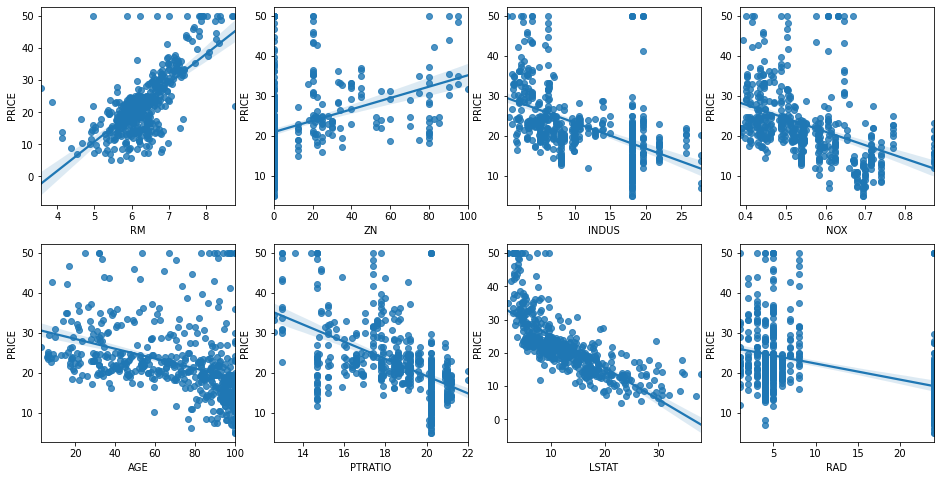

In [3]:
# matplotlib의 subplots()은 여러 개의 그래프를 한번에 표현하기 위해 자주 사용됨
# 2개의 행과 4개의 열을 가진 subplots 이용, axs: (4, 2)
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4) #row: [0,0,0,0,1,1,1,1]
    col = i%4 #col: [0,1,2,3,0,1,2,3]
    
    # 시본의 regplot을 이용해 산점도와 선형회귀직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

RM(방 개수), LSTAT(하위 계층의 비율)의 PRICE 영향도가 두드러지게 나타남
* RM: 양의 방향, 방의 개수가 클수록 집 값 증가
* LSTAT: 음의 방향, 하위 계층 비율이 적을수록 집 값 증가

#### 회귀 모델 생성

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse, rmse))
print("Variance score: {0:.3f}".format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [5]:
print("절편 값:", lr.intercept_)
print("회귀 계수값:", np.round(lr.coef_, 1))

절편 값: 40.9955951721646
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [6]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성
coeff = pd.Series(data=np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

* RM(방의 개수): 양의 값으로 회귀 계수가 가장 큼
* NOX(일산화질소 농도): 음의 값으로 회귀 계수가 가장 큼 

#### 교차 검증으로 MSE, RMSE 측정

In [9]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 fold set를 MSE로 구한 뒤 이를 기반으로 다시 RMSE를 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print("5 folds 의 개별 Negative MSE scores: ", np.round(neg_mse_scores, 2))
print("5 folds 의 개별 RMSE scores: ", np.round(rmse_scores, 2))
print("5 folds 의 평균 RMSE: {0:.3f}".format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE: 5.829
